## Setup

In [10]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift
from scipy.stats import norm, linregress
from scipy.optimize import curve_fit
from uncertainties import ufloat
from scipy.signal import find_peaks

In [11]:
# Consistent Plot Params
titleSize = 15
axisSize = 15
legendSize = 13
graphSizeSingle = (8, 6)
graphSizeDouble = (15, 6)

## Data Extraction

In [12]:
def extractRawData(folder, filename):
    prefix = "ugastro\\Lab3Data\\" + folder
    raw_data = np.load(prefix + filename, allow_pickle=True)
    return raw_data

def getDataBlocks(data, buffer=10, num_blocks=2030):
    new_data = np.zeros((num_blocks, 1024), dtype=complex)
    for i, block in enumerate(data[buffer:num_blocks+buffer]):
        new_data[i] = normalize(block['corr01'])
    return new_data

def getDataSingleBlock(data, block=1):
    real = data['time_data'][block][:, 0]
    imag = data['time_data'][block][:, 1]
    return normalize(real + (1j * imag))

def getSampleRate(data):
    return data['sample_rate']

def getGain(data):
    return data['gain']

def getUTC(data):
    return data['utc']

def getJulianDate(data):
    return data['jd']

def windowData(data):
    return data[:]

def normalize(data):
    return (data - np.mean(data)) #/ np.std(data)

def getTimes(N, sample_rate=3.1e6):
    return [i / sample_rate for i in range(0, N)]

In [ ]:
# Week 1
folder = "Week1_Testing\\"
data_test_raw = extractRawData(folder, "test_observatin_data.npy")
data_test = getDataBlocks(data_test_raw)
data_test_2_raw = extractRawData(folder, "Mar12_test_observation_data.npz")
data_test_2 = getDataBlocks(data_test_2_raw['arr_0'])

[{'corr01': array([6.1062844+0.j, 0.       +0.j, 0.       +0.j, ..., 0.       +0.j,
        0.       +0.j, 0.       +0.j]), 'acc_cnt': 407527, 'time': 1741818384.919517}
 {'corr01': array([ 5.62603539-0.08534731j, -0.52721494-0.05303408j,
        -0.55067497-0.01258847j, ..., -0.49270642-0.16473132j,
        -0.4202097 -0.21121232j, -0.46336173-0.17880734j]), 'acc_cnt': 407528, 'time': 1741818386.2212744}
 {'corr01': array([5.93912844+0.j, 0.        +0.j, 0.        +0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j]), 'acc_cnt': 407529, 'time': 1741818387.4569595}
 ...
 {'corr01': array([6.07527523+0.j, 0.        +0.j, 0.        +0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j]), 'acc_cnt': 408780, 'time': 1741819951.267957}
 {'corr01': array([6.08022936+0.j, 0.        +0.j, 0.        +0.j, ...,
        0.        +0.j, 0.        +0.j, 0.        +0.j]), 'acc_cnt': 408781, 'time': 1741819952.8130608}
 {'corr01': array([6.01711009+0.j, 0.        +0.j, 0.   

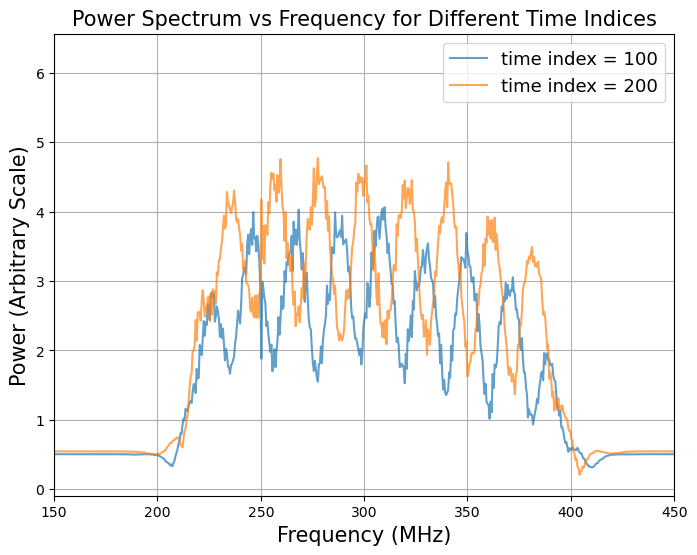

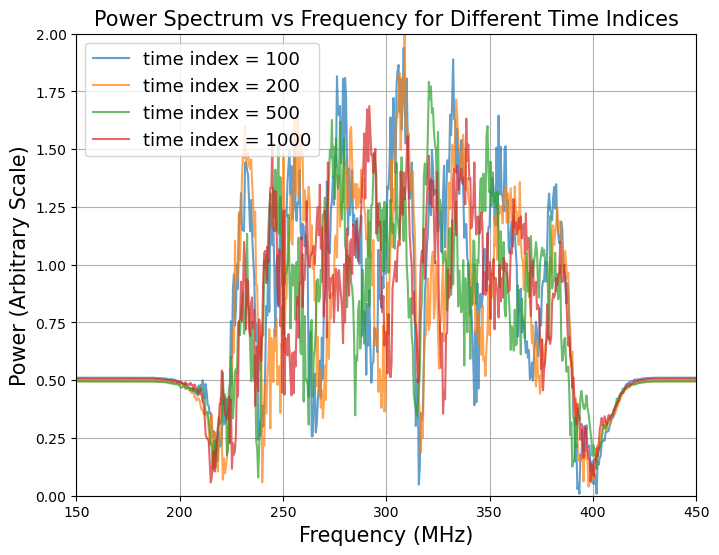

In [31]:
def plot_power_spectrum(data, indices=[100], xlim=None, ylim=None):
    plt.figure(figsize=graphSizeSingle)
    freqs = np.linspace(0, 500, len(data[0]))

    for index in indices:
        spectrum = np.abs(data[index])
        plt.plot(freqs, spectrum, label=f"time index = {index}", alpha=0.7)
    plt.xlabel("Frequency (MHz)", fontsize=axisSize)
    plt.ylabel("Power (Arbitrary Scale)", fontsize=axisSize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(fontsize=legendSize)
    plt.title(f"Power Spectrum vs Frequency for Different Time Indices", size=titleSize)
    plt.grid()
    plt.show()

plot_power_spectrum(data_test, indices=[100, 200], xlim=(150, 450))
plot_power_spectrum(data_test_2, indices=[100, 200, 500, 1000], xlim=(150, 450), ylim=(0, 2))

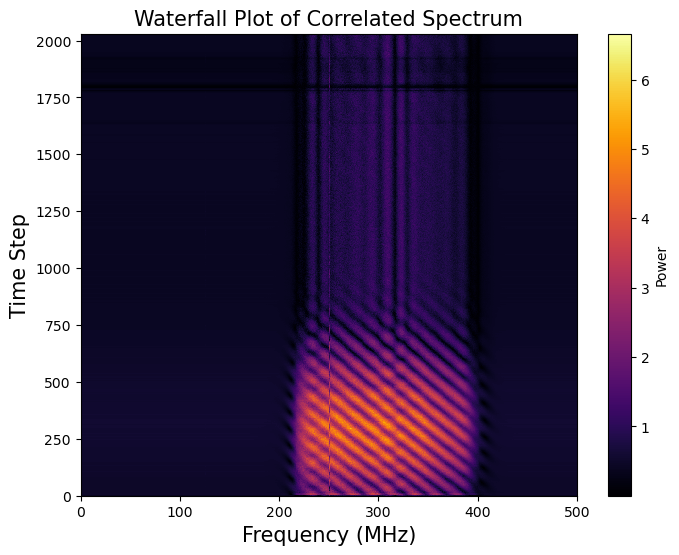

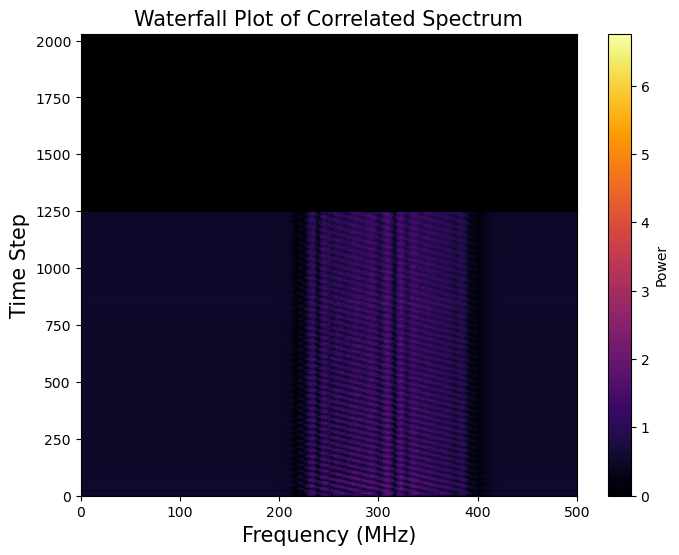

In [32]:
def plot_waterfall(data):
    plt.figure(figsize=graphSizeSingle)
    plt.imshow(np.abs(data), aspect='auto', cmap='inferno', norm='linear',
               extent=[0, 500, 0, data.shape[0]], interpolation='nearest',
               origin='lower')
    plt.colorbar(label="Power")
    plt.xlabel("Frequency (MHz)", fontsize=axisSize)
    plt.ylabel("Time Step", fontsize=axisSize)
    plt.title("Waterfall Plot of Correlated Spectrum", size=titleSize)
    plt.show()

plot_waterfall(data_test)
plot_waterfall(data_test_2)

In [ ]:
def plot_phase_evolution(data, freq_bin=512):
    time_steps = np.arange(data.shape[0])
    phases = np.angle(data[:, freq_bin])  # Extract column (frequency bin) and compute phase

    plt.figure(figsize=graphSizeSingle)
    plt.plot(time_steps, phases, marker='o', linestyle='-', label=f"Frequency Bin {freq_bin}")
    plt.xlabel("Time Step", fontsize=axisSize)
    plt.ylabel("Phase (radians)", fontsize=axisSize)
    plt.title(f"Fringe Phase Evolution at Frequency Bin {freq_bin}", size=titleSize)
    plt.legend(fontsize=legendSize)
    plt.grid()
    plt.show()

#plot_phase_evolution(data_test, freq_bin=512)

In [ ]:
print("First time step max power:", np.max(np.abs(data_test[0])))
print("Middle time step max power:", np.max(np.abs(data_test[1000])))
print("Last time step max power:", np.max(np.abs(data_test[2000])))

First time step max power: 6.479164848331056
Middle time step max power: 5.474793418763554
Last time step max power: 6.287294479134265


[ 1 24]
[ 1 20 24]
[ 1 24]
[ 1 20 24]
[ 1 20 24]


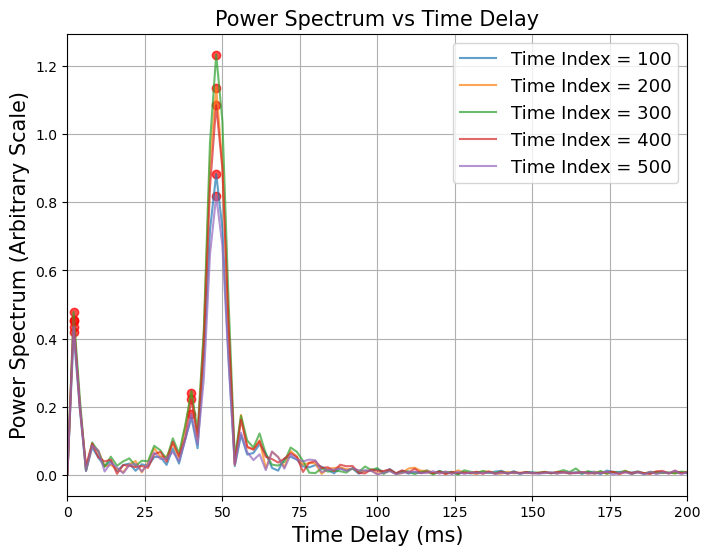

[ 1 24]
[ 1 20 24]
[ 1 24]
[ 1 20 24]


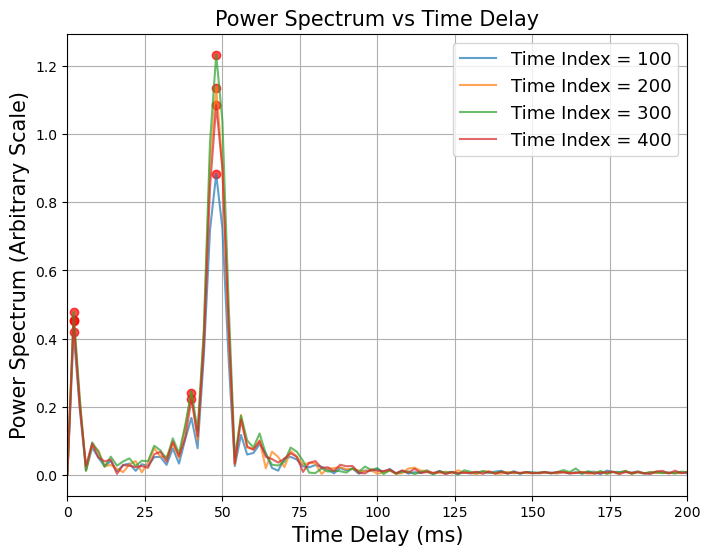

[ 1 19]
[ 1 20]
[ 1 20]
[ 1 20]
[ 1 20]


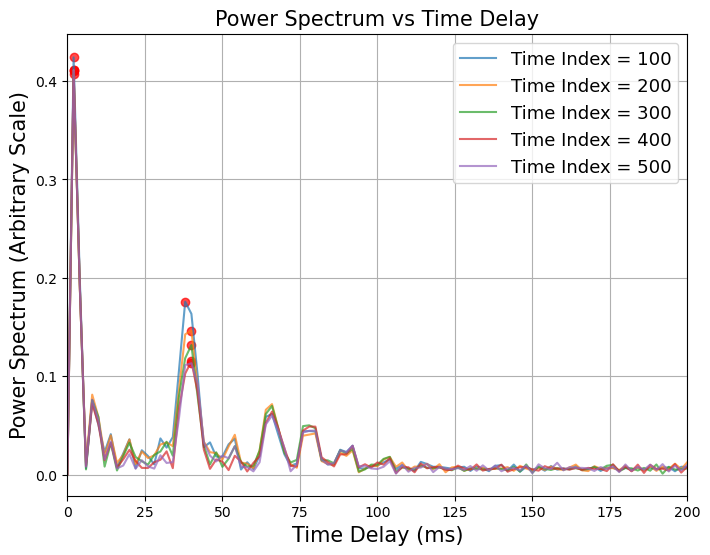

[24]
[24]
[24]
[24]
[24]


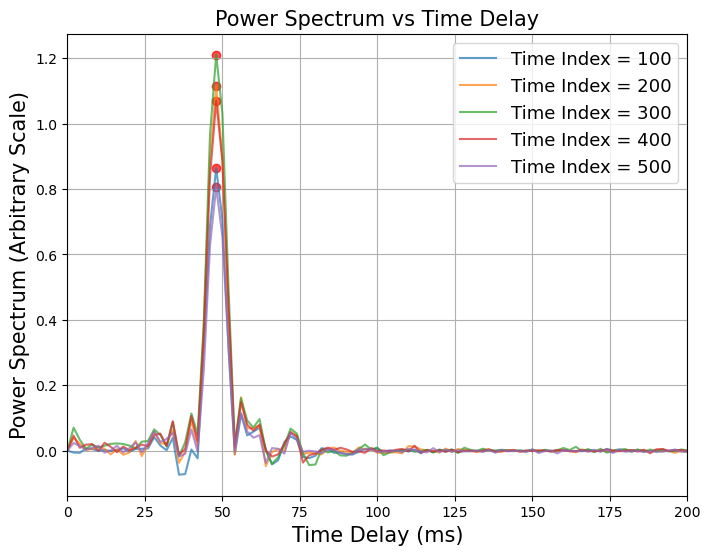

In [36]:
def plot_time_delay(data, indices=[100], xlim=None, ylim=None):
    plt.figure(figsize=graphSizeSingle)
    times = [2*i for i in range(len(data[0]))] # 2ms per sample

    for index in indices:
        time_signal = np.abs(ifft(data[index]))
        amplitude = np.abs(time_signal)
        threshold = 0.2 * np.max(amplitude)
        peaks, properties = find_peaks(amplitude, height=threshold)
        print(peaks)

        plt.plot(times, amplitude, label=f"Time Index = {index}", alpha=0.7)
        plt.scatter(peaks*2, amplitude[peaks], color='r', marker='o', alpha=0.7)
    plt.xlabel("Time Delay (ms)", fontsize=axisSize)
    plt.ylabel("Power Spectrum (Arbitrary Scale)", fontsize=axisSize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(fontsize=legendSize)
    plt.title(f"Power Spectrum vs Time Delay", size=titleSize)
    plt.grid()
    plt.show()

def plot_time_delay_corr(data, baseline, indices=[100], xlim=None, ylim=None):
    plt.figure(figsize=graphSizeSingle)
    times = [2*i for i in range(len(data[0]))] # 2ms per sample

    for index in indices:
        time_signal = np.abs(ifft(data[index]))
        time_signal_baseline = np.abs(ifft(baseline[index]))
        amplitude = np.abs(time_signal)
        amplitude_baseline = np.abs(time_signal_baseline)
        amplitude -= amplitude_baseline
        threshold = 0.2 * np.max(amplitude)
        peaks, properties = find_peaks(amplitude, height=threshold)
        print(peaks)

        plt.plot(times, amplitude, label=f"Time Index = {index}", alpha=0.7)
        plt.scatter(peaks*2, amplitude[peaks], color='r', marker='o', alpha=0.7)
    plt.xlabel("Time Delay (ms)", fontsize=axisSize)
    plt.ylabel("Power Spectrum (Arbitrary Scale)", fontsize=axisSize)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.legend(fontsize=legendSize)
    plt.title(f"Power Spectrum vs Time Delay", size=titleSize)
    plt.grid()
    plt.show()

plot_time_delay(data_test, indices=[100, 200, 300, 400, 500], xlim=(0, 200))
plot_time_delay(data_test[:500], indices=[100, 200, 300, 400], xlim=(0, 200))
plot_time_delay(data_test_2, indices=[100, 200, 300, 400, 500], xlim=(0, 200))
plot_time_delay_corr(data_test, data_test_2, indices=[100, 200, 300, 400, 500], xlim=(0, 200))

In [56]:
import ugradio.timing as t
print(t.local_time())
print(t.local_time()[4:8])
print(t.local_time()[8:10])
print(t.local_time()[11:13])
print(t.local_time()[14:16])


Wed Mar 12 23:29:15 2025
Mar 
12
23
29


look into np.angle